# Reinforcement learning with spiking neural networks

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ncskth/norse-rl/HEAD?filepath=book%2Fenv_grid.ipynb)

## Step 1: Setup the environment

The code below creates a virtual environment and imports our neuron simulator. Press the <span style="font-size: 280%; line-height: 24px; vertical-align: bottom;">‣</span> button to execute the code.

In [1]:
# Setup environment
from norse_rl import simulate
run = simulate.setup("Gridworld-v0")

# Import neuron simulator
import norse.torch as norse
from norse_rl.util import Linear

## Step 2: Program your "brain"

You can now program your "brain" by defining 
1. a **weight matrix** that describes synapse connectivity strength and
2. a **neural network** that describes how signals flow from top to bottom

Press the <span style="font-size: 280%; line-height: 24px; vertical-align: bottom;">‣</span> button to execute the code.

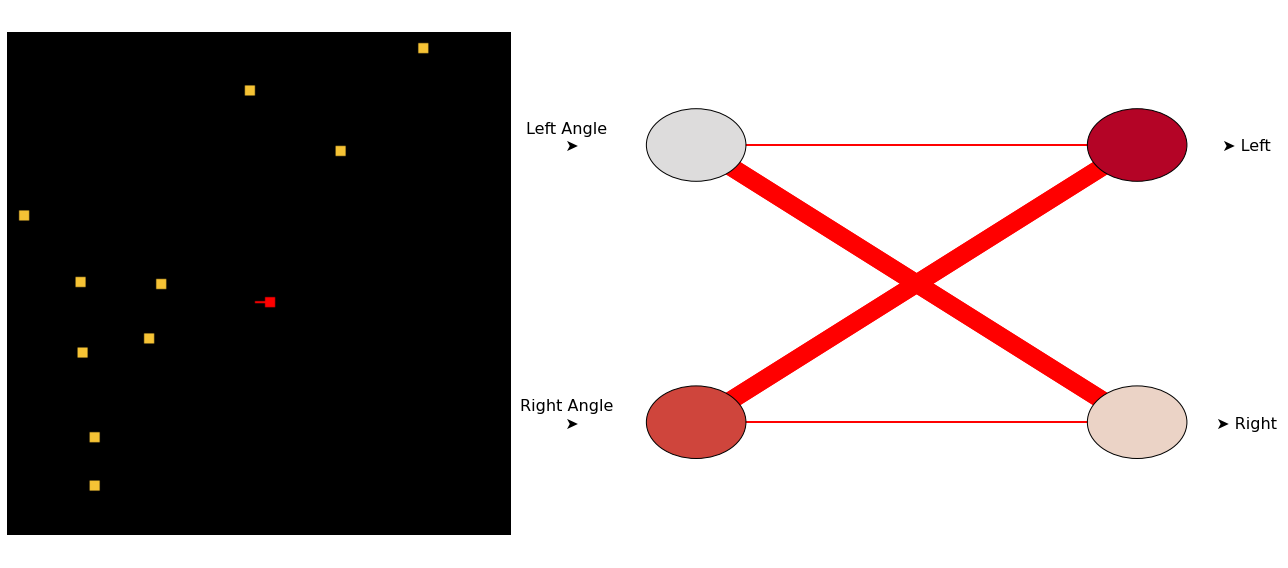

In [2]:
## Weight matrix
w = [ [ 0.3,  3] 
    , [ 3,  0.3] ]

## Neural network
model = norse.SequentialState(
    norse.LIFCell(),
    Linear(2, 2, w),
    norse.LICell(),
)

## Execute simulation
run(model)